В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [1]:
x = [1, 3, 4]
sum(x), sum(el**2 for el in x), sum((el - 1)**2 for el in x)
# result (8, 26, 13)

(8, 26, 13)

**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [33]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [3]:
import numpy as np

sum(sum_purchases) / len(sum_purchases), np.mean(sum_purchases)

# result (667.95, 667.95)

(667.95, 667.95)

**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [4]:
(sorted(sum_purchases)[len(sum_purchases)//2-1] + sorted(sum_purchases)[len(sum_purchases)//2]) / 2, np.median(sorted(sum_purchases))

# result (319.0, 319.0)

(319.0, 319.0)

1. Вибіркове середнє можна використати для обчислень даних, коли потрібно знати середнє значення на основі всіх даних.
2. Медінану можна використати, коли потрібно отримати середнє значення без урахування викидів.

**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [17]:
sum_purchases_minus_mean = [(el - sum(sum_purchases)/len(sum_purchases))**2 for el in sum_purchases]
np.sqrt(sum(sum_purchases_minus_mean)/(len(sum_purchases)-1)), np.std(sum_purchases, ddof=1)
# result (1124.5433447451132, 1124.5433447451132)

(1124.5433447451132, 1124.5433447451132)

**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [7]:
sixteen_years = [16] * 10
seventeen_years = [17] * 25
eighteen_years = [18] * 20
twenty_years = [20] * 2
all_years = sixteen_years + seventeen_years + eighteen_years + twenty_years
np.mean(all_years)

# result 17.280701754385966

17.280701754385966

**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [8]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [27]:
print (len(visits), len(sum_purchases))
# result (20, 20)

xy = [(sum_purchases[i] - np.mean(sum_purchases)) * (visits[i] - np.mean(visits)) for i in range(len(sum_purchases))]
cov_xy_raw = sum(xy)/(len(sum_purchases) - 1)
print(cov_xy_raw)
# result -990.1368421052633
print (np.cov(sum_purchases, visits))
# result array([[ 1.26459773e+06, -9.90136842e+02],
      #  [-9.90136842e+02,  8.46315789e+00]])
      # тут спочатку трохи збив різний формат представлення результатів, а потім звернула увагу на e+02


visits_minus_mean = [(el - sum(visits)/len(visits))**2 for el in visits]

corrcoef_raw = cov_xy_raw / (np.sqrt(sum(sum_purchases_minus_mean)/(len(sum_purchases)-1)) * np.sqrt(sum(visits_minus_mean)/(len(visits)-1)))
print(corrcoef_raw)
# result -0.3026584468766646

print(np.corrcoef(sum_purchases, visits))
# result [[ 1.         -0.30265845]
#  [-0.30265845  1.        ]]

20 20
-990.1368421052633
[[ 1.26459773e+06 -9.90136842e+02]
 [-9.90136842e+02  8.46315789e+00]]
-0.3026584468766646
[[ 1.         -0.30265845]
 [-0.30265845  1.        ]]


1. По результатам обчислень коефіцієнта кореляції Пірсона можна зробити висновок, що у нас присутня слабка негативна кореляція, тобто чим більше сума покупок, тим меньша кількість відвідувачів. Але якщо подивитись на графік розсіювання, то бачимо два аномальні викиди, де є великі суми покупок і невелика кількість відвідучачів (загалом значень доволь небагато - 20, тою такі аномальні викиди можуть значно спотворювати результати). А от всі інші значення знаходяться в одній площині, і більше схилються до відсутньої кореляції.

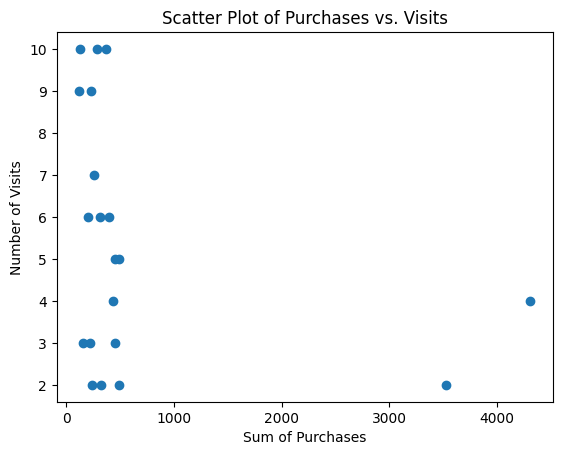

In [28]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

In [38]:
threshold = np.mean(sum_purchases) + 2 * np.std(sum_purchases)
print(threshold)
# result 2860.0885426108453

filtered_indexes = sum_purchases <= threshold
purchases_array = np.array(sum_purchases)
false_values = purchases_array[~filtered_indexes]
print(false_values)
# result [4310 3524]

visits_array = np.array(visits)
filtered_purchases = purchases_array[filtered_indexes]
filtered_visits = visits_array[filtered_indexes]
print(len(filtered_purchases), len(filtered_visits))
# result 18 18

cor_filtered = np.corrcoef(filtered_purchases, filtered_visits)

2860.0885426108453
[4310 3524]
18 18


array([[ 1.        , -0.36852121],
       [-0.36852121,  1.        ]])

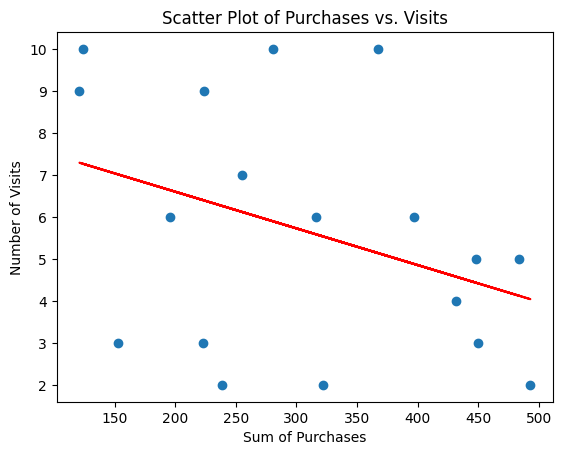

In [40]:
plt.scatter(filtered_purchases, filtered_visits)

coefficients = np.polyfit(filtered_purchases, filtered_visits, deg=1)  # Коефіцієнти лінії регресії
trend_line = np.poly1d(coefficients)  # Створення поліноміальної функції для трендової лінії
plt.plot(filtered_purchases, trend_line(filtered_purchases), color="red", label="Трендова лінія")

plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

1. Після вилучення викидів ступінь негативної кореляції трохи збільшиився. Але загалом візуально дивлячись на графік розсіювання важко було побачити якусь закономірність. Довелось візуалізувати лінію тренду, щоб побачити закономірності.
2. Можливо тут в принципі проблема полягає в тому, що дуже мало даних, тому майже кожна точка виглядає як викид. Дуже цікаві дані, коли було 10 та 9 відвідувачів, а сума їх покупок найменша (менша навіть, коли було 2 відвідувача). Треба більше даних для більш адекватного аналізу ситуації (що за товари купували, коли, хто купував тощо).